In [1]:
import sys
sys.path
sys.path.append('../')

In [3]:
from torchvision import datasets, transforms
import actlearn as al

In [4]:
al.ActiveLearning.set_seed()

In [5]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используется устройство: {device}")

Используется устройство: cuda


In [ ]:
train_mnist = datasets.MNIST('./data_AL', train=True, download=True)
test_mnist = datasets.MNIST('./data_AL', train=False, download=True)
train_fashion = datasets.FashionMNIST('./data_AL', train=True, download=True, transform=transforms.ToTensor())
test_fashion = datasets.FashionMNIST('./data_AL', train=False, download=True, transform=transforms.ToTensor())

X_train_mnist = train_mnist.data
y_train_mnist = train_mnist.targets
X_test_mnist = test_mnist.data
y_test_mnist = test_mnist.targets

X_train_fashion = train_fashion.data
y_train_fashion = train_fashion.targets
X_test_fashion = test_fashion.data
y_test_fashion = test_fashion.targets

alpha = 1.0
def reduce_dataset(X, y, alpha):
    n_samples = len(X)
    n_keep = int(alpha * n_samples)

    return X[:n_keep], y[:n_keep]

X_train_mnist, y_train_mnist = reduce_dataset(X_train_mnist, y_train_mnist, alpha)
X_test_mnist, y_test_mnist = reduce_dataset(X_test_mnist, y_test_mnist, alpha)
X_train_fashion, y_train_fashion = reduce_dataset(X_train_fashion, y_train_fashion, alpha)
X_test_fashion, y_test_fashion = reduce_dataset(X_test_fashion, y_test_fashion, alpha)
print(X_train_mnist.shape, y_train_mnist.shape, X_test_mnist.shape, y_test_mnist.shape)
print(X_train_fashion.shape, y_train_fashion.shape, X_test_fashion.shape, y_test_fashion.shape)

In [27]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="incremental", update_size=128, batch_size=128, metric="f1")


In [ ]:
AL1.fit()
AL2.fit()
AL3.fit()

Graph saved as incremental_RME_on_fashion-MNIST.pdf


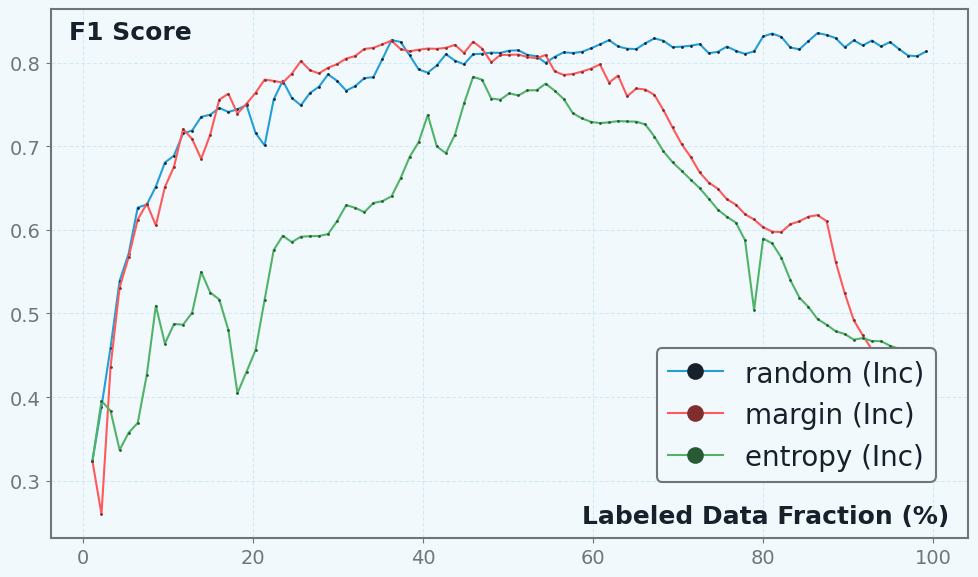

In [ ]:
al.plot_active_learning_results_many(AL1, AL2, AL3, dataset_name="Fashion-MNIST", name="incremental_RME_on_fashion-MNIST")

In [ ]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="cumulative", update_size=128, batch_size=128, metric="f1")

In [ ]:
AL1.fit()
AL2.fit()
AL3.fit()

In [ ]:
al.plot_active_learning_results_many(AL1, AL2, AL3, dataset_name="Fashion-MNIST", name="cumulative_RME_on_fashion-MNIST")

In [24]:
n_epochs=3

AL1 = al.ActiveLearning(al.ANN(hidden_dim=10), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)
AL2 = al.ActiveLearning(al.ANN(hidden_dim=100), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)
AL3 = al.ActiveLearning(al.ANN(hidden_dim=1000), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)

In [ ]:
AL1.fit()
AL2.fit()
AL3.fit()

Graph saved as incremental_NEURONS_on_fashion-MNIST.pdf


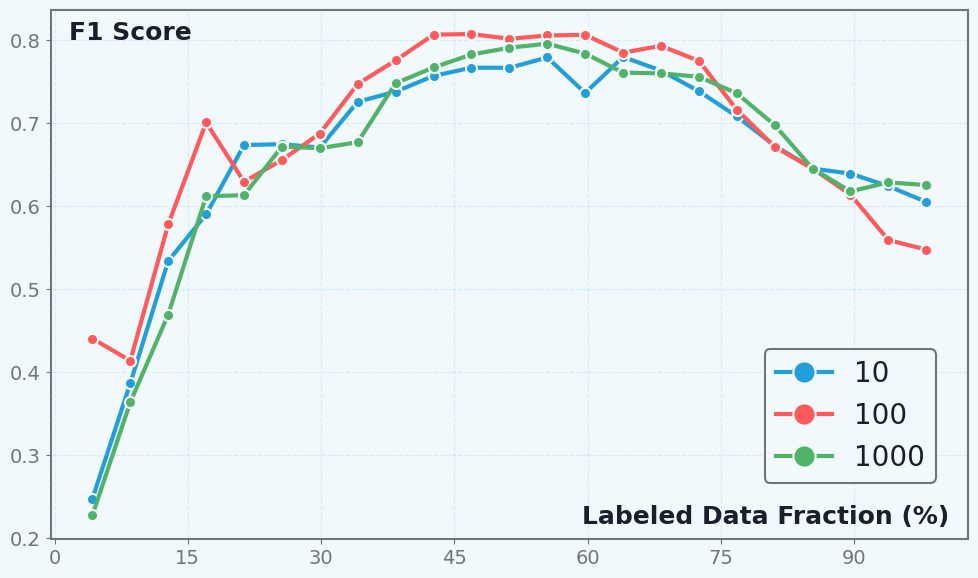

In [ ]:
al.plot_active_learning_results_many(
    AL1, AL2, AL3, dataset_name="Fashion-MNIST", name="incremental_NEURONS_on_fashion-MNIST",
    legend=['10', '100', '1000']
    )

In [27]:
n_epochs=3

AL1 = al.ActiveLearning(al.ANN(hidden_dim=10), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)
AL2 = al.ActiveLearning(al.ANN(hidden_dim=100), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)
AL3 = al.ActiveLearning(al.ANN(hidden_dim=1000), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=n_epochs)

In [ ]:
AL1.fit()
AL2.fit()
AL3.fit()

Graph saved as cumulative_NEURONS_on_fashion-MNIST.pdf


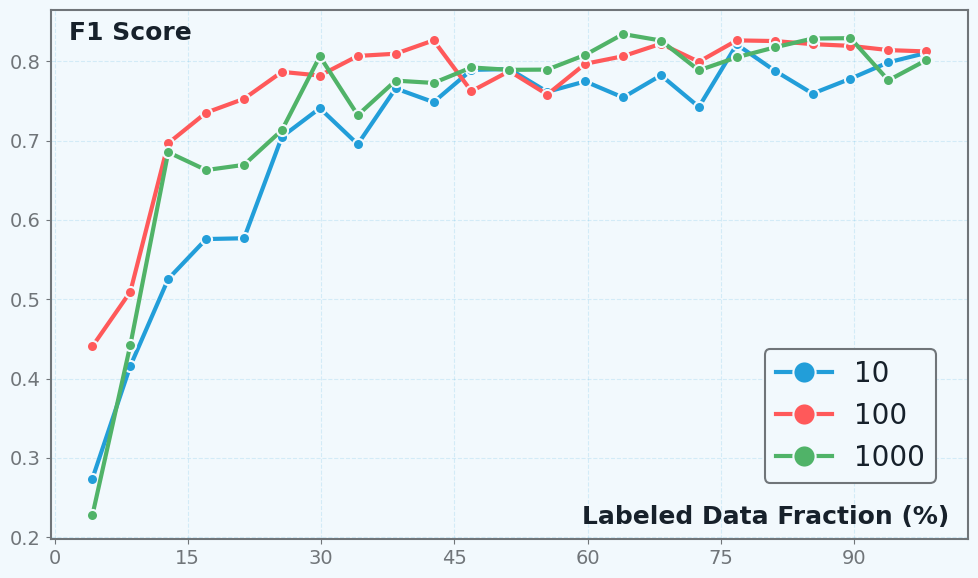

In [ ]:
al.plot_active_learning_results_many(
    AL1, AL2, AL3, dataset_name="Fashion-MNIST", name="cumulative_NEURONS_on_fashion-MNIST",
    legend=['10', '100', '1000']
    )

In [8]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")

In [ ]:
AL1.fit()

Graph saved as incremental_M_SINGLE_on_fashion-MNIST.pdf


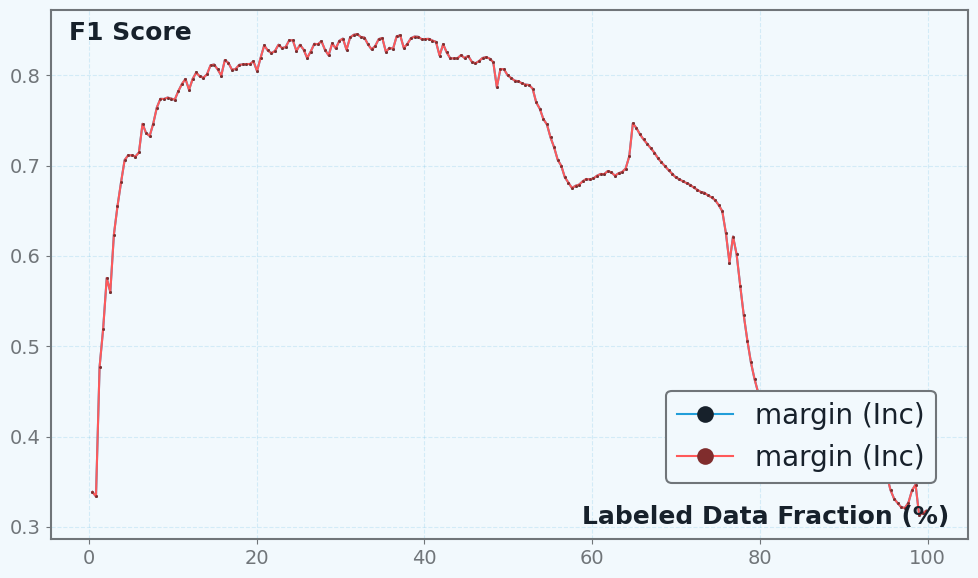

In [ ]:
al.plot_active_learning_results_many(AL1, AL1, dataset_name="Fashion-MNIST", name="incremental_M_SINGLE_on_fashion-MNIST")

In [ ]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=24)

In [ ]:
AL1.fit()

In [ ]:
al.plot_active_learning_results_many(AL1, dataset_name="Fashion-MNIST", name="incremental_M_SKIP_SIZE_on_fashion-MNIST")